<a href="https://colab.research.google.com/github/aiiimek/Python/blob/main/lab7_MN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

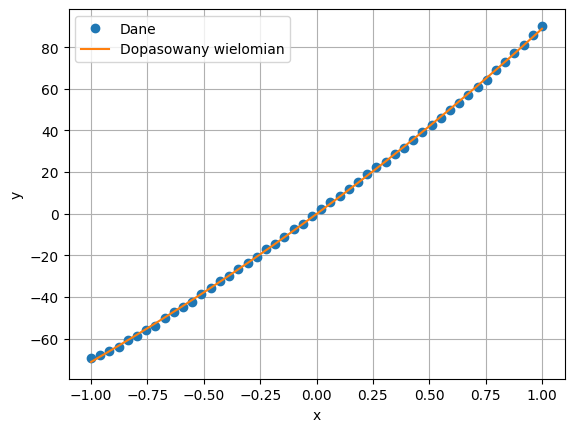

Stopień wielomianu: 3, Odchylenie standardowe: 0.6607639843631764


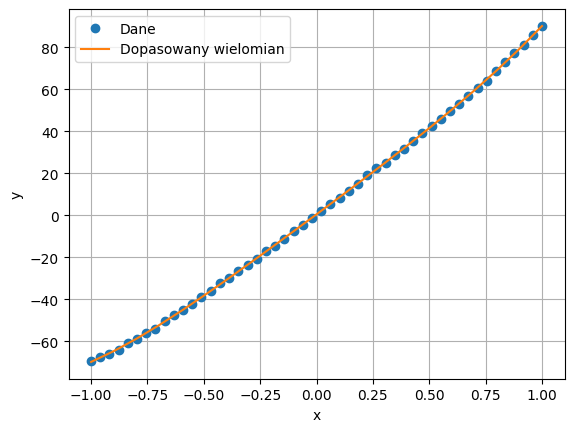

Stopień wielomianu: 5, Odchylenie standardowe: 0.31979335757261274


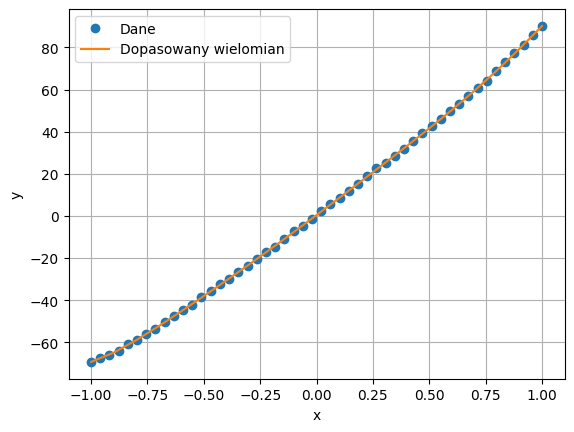

Stopień wielomianu: 7, Odchylenie standardowe: 0.29102143493830357


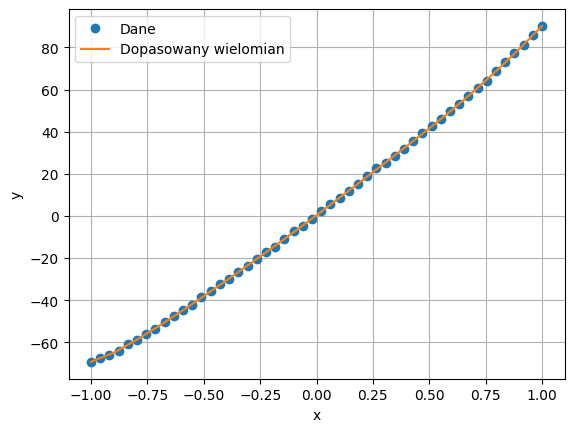

Stopień wielomianu: 10, Odchylenie standardowe: 0.29984459054287144


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_data(a, b, c, size=50):
    """Generuje dane według funkcji f(x) = ax^6 + bx^2 + cx + random()"""
    x = np.linspace(-1, 1, size)
    y = a * x**6 + b * x**2 + c * x + np.random.random(size)
    return x, y

def swapRows(v, i, j):
    if len(v.shape) == 1:
        v[i], v[j] = v[j], v[i]
    else:
        v[[i, j], :] = v[[j, i], :]

def swapCols(v, i, j):
    v[:, [i, j]] = v[:, [j, i]]

def gaussPivot(a, b, tol=1.0e-12):
    n = len(b)
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i, :]))
    for k in range(0, n - 1):
        p = np.argmax(np.abs(a[k:n, k]) / s[k:n]) + k
        if abs(a[p, k]) < tol:
            raise ValueError('Matrix is singular')
        if p != k:
            swapRows(b, k, p)
            swapRows(s, k, p)
            swapRows(a, k, p)
        for i in range(k + 1, n):
            if a[i, k] != 0.0:
                lam = a[i, k] / a[k, k]
                a[i, k + 1:n] = a[i, k + 1:n] - lam * a[k, k + 1:n]
                b[i] = b[i] - lam * b[k]
    if abs(a[n - 1, n - 1]) < tol:
        raise ValueError('Matrix is singular')
    b[n - 1] = b[n - 1] / a[n - 1, n - 1]
    for k in range(n - 2, -1, -1):
        b[k] = (b[k] - np.dot(a[k, k + 1:n], b[k + 1:n])) / a[k, k]
    return b

def polyFit(xData, yData, m):
    a = np.zeros((m + 1, m + 1))
    b = np.zeros(m + 1)
    s = np.zeros(2 * m + 1)
    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m + 1):
            b[j] += temp
            temp *= xData[i]
        temp = 1.0
        for j in range(2 * m + 1):
            s[j] += temp
            temp *= xData[i]
    for i in range(m + 1):
        for j in range(m + 1):
            a[i, j] = s[i + j]
    return gaussPivot(a, b)

def stdDev(c, xData, yData):
    def evalPoly(c, x):
        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p * x + c[m - j - 1]
        return p
    n = len(xData) - 1
    m = len(c) - 1
    sigma = 0.0
    for i in range(n + 1):
        p = evalPoly(c, xData[i])
        sigma += (yData[i] - p) ** 2
    sigma = np.sqrt(sigma / (n - m))
    return sigma

def plotPoly(xData, yData, coeff, xlab='x', ylab='y'):
    m = len(coeff)
    x1 = min(xData)
    x2 = max(xData)
    dx = (x2 - x1) / 20.0
    x = np.arange(x1, x2 + dx / 10.0, dx)
    y = np.zeros(len(x))
    for i in range(m):
        y += coeff[i] * x**i
    plt.plot(xData, yData, 'o', label='Dane')
    plt.plot(x, y, '-', label='Dopasowany wielomian')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    a, b, c = 5, 5, 80
    xData, yData = generate_data(a, b, c)
    degrees = [3, 5, 7, 10]
    for m in degrees:
        coeff = polyFit(xData, yData, m)
        plotPoly(xData, yData, coeff, xlab='x', ylab='y')
        sigma = stdDev(coeff, xData, yData)
        print(f"Stopień wielomianu: {m}, Odchylenie standardowe: {sigma}")

if __name__ == "__main__":
    main()


Dopasowane parametry: a = 1.3273, b = 0.5345


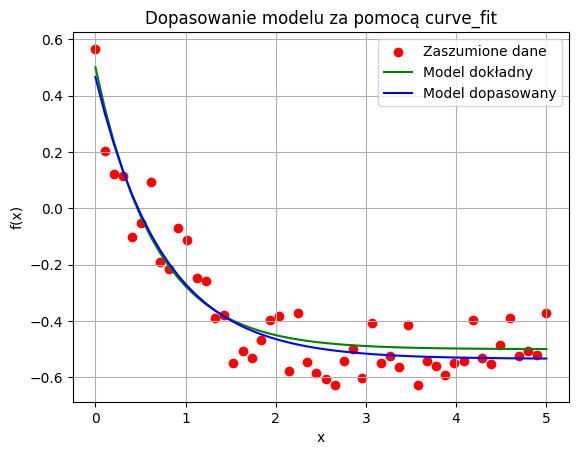

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def model_function(x, a, b):
    return np.exp(-a * x) - b

def generate_noisy_data(a, b, size=50, noise_level=0.1):
    x = np.linspace(0, 5, size)
    y = np.exp(-a * x) - b
    noise = np.random.normal(0, noise_level, size)
    y_noisy = y + noise
    return x, y_noisy


def main():

    true_a, true_b = 1.5, 0.5
    x_data, y_data = generate_noisy_data(true_a, true_b)


    initial_guess = [1.0, 1.0]
    popt, pcov = curve_fit(model_function, x_data, y_data, p0=initial_guess)


    fitted_a, fitted_b = popt
    print(f"Dopasowane parametry: a = {fitted_a:.4f}, b = {fitted_b:.4f}")

    plt.scatter(x_data, y_data, label="Zaszumione dane", color="red")
    plt.plot(x_data, model_function(x_data, true_a, true_b), label="Model dokładny", color="green")
    plt.plot(x_data, model_function(x_data, fitted_a, fitted_b), label="Model dopasowany", color="blue")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.title("Dopasowanie modelu za pomocą curve_fit")
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()
